In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

from pyclustering.cluster.kmedoids import kmedoids

from scipy.spatial import distance_matrix

from scipy.special import comb as combination

import itertools as it

from scipy.spatial import cKDTree

import time


# Ptos de Parada

In [132]:
ptos_parada = pd.read_excel('Dados brutos/_PontosEletrico_.xlsx').sort_values('Densidade', ascending=False)
ptos_parada

,Ponto,Ordem,Lat,Long,Densidade
0,1,FEC / RS,-22.815664,-47.062650,175527.01560
1,2,RU / BCCL,-22.816567,-47.072617,161245.95310
2,3,ADunicamp (Associação de Docentes da Unicamp),-22.813326,-47.065407,134607.79690
3,4,IC / Pavilhão do IA,-22.815047,-47.064360,131100.25000
4,5,CEPETRO / Funcamp,-22.812777,-47.067752,103630.47660
5,6,NEPP / IC,-22.814714,-47.064024,98755.28906
6,7,FEA / Praça da Paz,-22.821312,-47.067412,95977.38281
7,8,CECI Berçário / FEA,-22.821001,-47.068121,91303.71094
8,9,IB / SIARQ,-22.819147,-47.072227,86938.40625
9,10,IQ / FEA,-22.819335,-47.067119,75935.28125


# Gera matriz de distancias


diferenca entre lat e long dao resultado em que unidade?

In [133]:
# diferenca entre lat e long dao resultado em que unidade? --> tem mais uma funcao pra transformar isso em metro

data = ptos_parada[['Lat','Long']].values

ctys = ptos_parada['Ponto'].values

df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=ctys)
dm_ptos_parada = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

## troca o index e as colunas para ficar compativel com a logica da combinaria abaixo
dm_ptos_parada.columns = [i for i in range(0,35)]
dm_ptos_parada.reset_index(drop=True, inplace=True)

dm_ptos_parada

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.010008,0.003615,0.001818,0.005862,0.001670,0.007388,0.007643,0.010191,0.005784,...,0.012712,0.034252,0.013622,0.002438,0.014009,0.004007,0.002639,0.009515,0.011608,0.011520
1,0.010008,0.000000,0.007905,0.008396,0.006166,0.008791,0.007044,0.006315,0.002610,0.006155,...,0.011934,0.035653,0.013809,0.009651,0.017226,0.013064,0.009693,0.007094,0.015506,0.015419
2,0.003615,0.007905,0.000000,0.002014,0.002409,0.001959,0.008234,0.008141,0.008966,0.006248,...,0.014223,0.031767,0.015503,0.005276,0.016781,0.007621,0.005465,0.010059,0.014457,0.014365
3,0.001818,0.008396,0.002014,0.000000,0.004081,0.000473,0.006969,0.007043,0.008871,0.005099,...,0.012749,0.033518,0.013887,0.003276,0.014871,0.005732,0.003469,0.008979,0.012522,0.012431
4,0.005862,0.006166,0.002409,0.004081,0.000000,0.004201,0.008541,0.008232,0.007784,0.006588,...,0.014607,0.031273,0.016103,0.007053,0.018005,0.009812,0.007213,0.010009,0.015785,0.015692
5,0.001670,0.008791,0.001959,0.000473,0.004201,0.000000,0.007417,0.007504,0.009324,0.005562,...,0.013158,0.033202,0.014265,0.003479,0.015135,0.005668,0.003680,0.009440,0.012770,0.012680
6,0.007388,0.007044,0.008234,0.006969,0.008541,0.007417,0.000000,0.000775,0.005280,0.001999,...,0.006073,0.039781,0.007589,0.005412,0.010267,0.008285,0.005298,0.002151,0.008464,0.008376
7,0.007643,0.006315,0.008141,0.007043,0.008232,0.007504,0.000775,0.000000,0.004505,0.001944,...,0.006406,0.039504,0.008034,0.005832,0.010943,0.008853,0.005739,0.001939,0.009194,0.009107
8,0.010191,0.002610,0.008966,0.008871,0.007784,0.009324,0.005280,0.004505,0.000000,0.005111,...,0.009459,0.038122,0.011373,0.009208,0.015081,0.012577,0.009194,0.004764,0.013550,0.013466
9,0.005784,0.006155,0.006248,0.005099,0.006588,0.005562,0.001999,0.001944,0.005111,0.000000,...,0.008061,0.037794,0.009515,0.004232,0.011777,0.007510,0.004183,0.003883,0.009764,0.009672


# Calculando as combinacoes de pontos de parada

 - Como visto acima tem muitas combinacoes a serem geradas 

 - Se somasse de 35Cr1 a 35Cr35 sao 34_359_738_366 TRINTA E QUATRO TRILHOES DE COMBIINACOES           --> '_'

 - Nao tem armazenamento razoavel nem pra GERAR todas as combinacoes, esse crescimento eh exponencial e muito rapido

 - POR SORTE o Kmedianas nao precisa testar todas as combinacoes para convergir para os pontos mais representativos (k melhores medianas)

 - Pq quando ele roda com um chute inicial qualquer ele ja sugere novas medianas que otimizaram melhor o metodo

 - entao com 100_000 iteracoes (arbitario) , vai ter bastante espaco amostral pra ter boas medianas
 
 - Alem disso quando usamos matrizes de distancias pra calcular, que sera o caso , melhora a performance

 - 4_537_567_650 35Cr17 



In [134]:
4_537_567_650 * 0.01    #   453_756_765 1%    45_375_676 10%

45375676.5

## Numero de combinacoes a cada 35 escolhe N

In [135]:
smoo = 0
for n_ptos in range(1,36):
    smoo += combination(35,n_ptos, exact=True)
    print('numero de combinacoes usando 35 escolhe {}'.format(n_ptos), combination(35,n_ptos, exact=True))
# 183579396
print(smoo)
# 35Cr17 --> 4_537_567_650 --> 4 trilhoes

numero de combinacoes usando 35 escolhe 1 35
numero de combinacoes usando 35 escolhe 2 595
numero de combinacoes usando 35 escolhe 3 6545
numero de combinacoes usando 35 escolhe 4 52360
numero de combinacoes usando 35 escolhe 5 324632
numero de combinacoes usando 35 escolhe 6 1623160
numero de combinacoes usando 35 escolhe 7 6724520
numero de combinacoes usando 35 escolhe 8 23535820
numero de combinacoes usando 35 escolhe 9 70607460
numero de combinacoes usando 35 escolhe 10 183579396
numero de combinacoes usando 35 escolhe 11 417225900
numero de combinacoes usando 35 escolhe 12 834451800
numero de combinacoes usando 35 escolhe 13 1476337800
numero de combinacoes usando 35 escolhe 14 2319959400
numero de combinacoes usando 35 escolhe 15 3247943160
numero de combinacoes usando 35 escolhe 16 4059928950
numero de combinacoes usando 35 escolhe 17 4537567650
numero de combinacoes usando 35 escolhe 18 4537567650
numero de combinacoes usando 35 escolhe 19 4059928950
numero de combinacoes usan

## Geracao de cada combinacao individualmente de cada 35 escolhe N



In [136]:
# combs --> guarda todas as combinacoes de pontos 35 escolhe N, uma em cada indice
# combs[N-1] --> tem o len() do resultado da combinacao 35CrN
# combs[N][k] --> conteum uma combinacao das 35CrN, um array
# combs[N][k][0] --> necessario para acessar os itens do array


In [137]:
combinacoes = []

### n_ptos vai variar de ESCOLHE 1 a ESCOLHE 35
for n_ptos in range(1,36):
    combinacoes.append([])
    tic = time.perf_counter()

    for comb in it.combinations([i for i in range(0, 35)], n_ptos):
        # enquanto (pra um kCrn tiver enchido        E     o numero de combinacoes for diferente do numero de 
        #           menos de 100_000 combinacoes)           do numero total (isso eh so pra nao limitar os que tem menos de 100K comb)
        if (len(combinacoes[n_ptos-1]) < 10_000) and (combination(35,n_ptos, exact=True) != len(combinacoes[n_ptos-1]) ) :
        #     pass
            combinacoes[n_ptos-1].append(comb)
    tac = time.perf_counter()

    print(' 35 escolher {} contem --> {}'.format(n_ptos,len(combinacoes[n_ptos-1])), f'\t tempo de processamento da comb  {tac - tic:0.4f}', )



 35 escolher 1 contem --> 35 	 tempo de processamento da comb  0.0000
 35 escolher 2 contem --> 595 	 tempo de processamento da comb  0.0002
 35 escolher 3 contem --> 6545 	 tempo de processamento da comb  0.0028
 35 escolher 4 contem --> 10000 	 tempo de processamento da comb  0.0087
 35 escolher 5 contem --> 10000 	 tempo de processamento da comb  0.0389
 35 escolher 6 contem --> 10000 	 tempo de processamento da comb  0.1683
 35 escolher 7 contem --> 10000 	 tempo de processamento da comb  0.6766
 35 escolher 8 contem --> 10000 	 tempo de processamento da comb  2.4140
 35 escolher 9 contem --> 10000 	 tempo de processamento da comb  7.5762
 35 escolher 10 contem --> 10000 	 tempo de processamento da comb  19.7463
 35 escolher 11 contem --> 10000 	 tempo de processamento da comb  47.4624
 35 escolher 12 contem --> 10000 	 tempo de processamento da comb  103.6866
 35 escolher 13 contem --> 10000 	 tempo de processamento da comb  188.7241
 35 escolher 14 contem --> 10000 	 tempo de pro

In [138]:
### Salva lista pra nao ter que recalcular

# data_ = np.array(combinacoes)
# np.savez("minhas_combinacoes", data_)

In [139]:
## Le o arquivo minhas_combinacoes    
    
# a = np.load("minhas_combinacoes.npz") #make sure you use the .npz!
# b = a['arr_0']

In [140]:
len(combinacoes), len(combinacoes[9])


(35, 10000)

In [141]:
combinacoes[9]


[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 10),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 13),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 14),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 15),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 16),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 17),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 18),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 19),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 20),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 21),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 22),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 23),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 24),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 25),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 26),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 27),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 28),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 29),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 30),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 31),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 32),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 33),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 34),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 12),
 (0, 1, 2, 3, 4

In [142]:
# n_ptos = 13
# combs.append([])

# for comb in it.combinations([i for i in range(0, 35)], n_ptos):
#     # print(np.array(comb))
#     combs[n_ptos-1].append(comb)
# print('numero de combinacoes usando 35 escolhe {}'.format(n_ptos), len(combs[n_ptos-1]))

## Roda o K medianas

In [143]:
## pego uma serie de medianas
    ## rodo o kamedias e ele adequa quais ptos de onibus serao representados por essas medianas
    ## calculo distancia 
    ## guardo a menor distancia e a quais pontos ela corresponte

### Funcao de calcular a distancia entre os pontos representativos (medoid) e os pontos q ele representa

In [144]:
## funcao de calcular a distancia entre os pontos representativos (medoid) e 
#           os pontos q ele representa

def calcula_dist_medoids(df, clusters, medoids):

    dist = 0
    for idx, cl in enumerate(clusters):
        # print('this is cl', cl)
        # print('this is md cl\t -->',medoids[idx], cl )

        dist += df.loc[ cl , medoids[idx]  ].sum()

        # display(df.loc[ cl , medoids[idx]  ])
        # print(dist)

    return dist

# clusters=[10,12]
# medoids = [[1,2,3,4,5,6,7,8,9], [10,11,12,13,14,15,16]]
# calcula_dist_medoids(dm_ptos_parada, clusters, medoids)


### Roda o k medoids pra todos os os pontos

sao tres criterios de parada 
(um minuto rodando o kmedoids) ou (1000 iteracoes) ou (ja rodou todas as combinacoes)

In [145]:
k_medoids_clusters = []
k_medoids_medoids = []

# N vai de 0 a 34
for combs_ in range(0,len(combinacoes)):

    # print('N', N,'len combinacoes', len(combinacoes))
    print(combs_+1,'----------------------------------------------------------------------')
    sum_ = 10000    ### sum_ comeca com 10000 e deve ser minimizado
    tic = time.perf_counter()
    tac = 0
    i = 0
    ## sao tres criterios de parada
    ## (um minuto rodando o kmedoids) ou (1000 iteracoes) ou (ja rodou todas as combinacoes)
    while (tac - tic) < 300  and (i!=10_000) and (i!=len(combinacoes[combs_])): ## 60 e 600 sao 1 and 10 minutos para o processsamento ocorrer

        combo = combinacoes[combs_]
        cmb = combo[i]
        # print(cmb)
        kmedoids_instance = kmedoids(dm_ptos_parada.values, [c for c in cmb], data_type='distance_matrix')
        kmedoids_instance.process()
        clusters = kmedoids_instance.get_clusters()
        medoids = kmedoids_instance.get_medoids()

        minimo_local = calcula_dist_medoids(dm_ptos_parada, clusters, medoids)

        # print('_________________________________________')
        # print([c for c in cmb])
        # print('sum_', minimo_local)
        # print('medoids', medoids)

        if minimo_local < sum_:

            sum_ = minimo_local
            cl_local = clusters
            md_local = medoids
        i += 1
        tac = time.perf_counter()
    
    # k_medoids_clusters.append([])
    # k_medoids_medoids.append([])

    # k_medoids_clusters[combs_].append(cl_local)
    # k_medoids_medoids[combs_].append(md_local)

    k_medoids_clusters.append(cl_local)
    k_medoids_medoids.append(md_local)
    
    print('Duracao da execucao', tac - tic)
    print('qunatidade de iteracoes', i)
    print('distancia minimizada', sum_)
    print('pontos representativos', cl_local)
    print('lista de ptos representadps', md_local)


1 ----------------------------------------------------------------------
Duracao da execucao 0.06746783301059622
qunatidade de iteracoes 35
distancia minimizada 0.24055328153711866
pontos representativos [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
lista de ptos representadps [9]
2 ----------------------------------------------------------------------
Duracao da execucao 1.517135292000603
qunatidade de iteracoes 595
distancia minimizada 0.16806916970589103
pontos representativos [[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 26, 28, 30, 31], [6, 7, 10, 11, 13, 16, 17, 18, 24, 25, 27, 29, 32, 33, 34]]
lista de ptos representadps [12, 10]
3 ----------------------------------------------------------------------
Duracao da execucao 27.403788292009267
qunatidade de iteracoes 6545
distancia minimizada 0.13401274470589175
pontos representativos [[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 2

In [146]:
for medoid in range(len(k_medoids_medoids)):
    print(k_medoids_medoids[medoid])

[9]
[12, 10]
[12, 26, 10]
[3, 26, 17, 7]
[0, 7, 11, 26, 23]
[0, 7, 17, 34, 26, 19]
[31, 19, 7, 3, 17, 26, 34]
[30, 19, 34, 17, 26, 3, 31, 7]
[31, 30, 33, 3, 10, 26, 7, 19, 17]
[30, 1, 33, 17, 23, 3, 26, 7, 10, 31]
[21, 1, 33, 26, 23, 17, 7, 10, 3, 31, 30]
[21, 1, 33, 3, 23, 26, 30, 7, 17, 31, 10, 13]
[21, 1, 33, 3, 9, 26, 10, 7, 13, 28, 23, 22, 17]
[31, 1, 22, 26, 23, 5, 6, 17, 13, 10, 12, 21, 32, 33]
[21, 1, 31, 26, 23, 5, 22, 7, 18, 9, 11, 17, 33, 13, 15]
[21, 20, 23, 26, 18, 5, 33, 7, 8, 22, 11, 17, 12, 13, 14, 28]
[21, 1, 18, 26, 23, 5, 33, 7, 8, 31, 11, 17, 12, 13, 14, 20, 22]
[21, 1, 32, 26, 23, 5, 30, 7, 8, 18, 10, 33, 28, 13, 14, 15, 17, 20]
[18, 1, 29, 26, 23, 5, 30, 7, 8, 32, 10, 28, 21, 13, 14, 15, 17, 20, 33]
[18, 1, 32, 26, 23, 5, 22, 7, 8, 29, 10, 28, 21, 13, 14, 15, 16, 17, 20, 33]
[29, 1, 2, 26, 21, 5, 34, 7, 8, 16, 17, 11, 20, 13, 14, 15, 18, 23, 24, 28, 30]
[32, 1, 2, 26, 21, 5, 33, 7, 8, 9, 22, 11, 29, 13, 14, 15, 16, 17, 18, 20, 23, 28]
[32, 1, 2, 26, 29, 5, 22, 7, 

In [147]:
for cluster in range(len(k_medoids_clusters)):
    print(k_medoids_clusters[cluster])

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
[[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 26, 28, 30, 31], [6, 7, 10, 11, 13, 16, 17, 18, 24, 25, 27, 29, 32, 33, 34]]
[[0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 28, 30, 31], [26], [6, 7, 10, 11, 13, 16, 17, 18, 24, 25, 27, 29, 32, 33, 34]]
[[0, 2, 3, 4, 5, 12, 15, 19, 20, 21, 22, 23, 28, 30, 31], [26], [10, 11, 13, 17, 18, 25, 27, 29, 33, 34], [1, 6, 7, 8, 9, 14, 16, 24, 32]]
[[0, 3, 5, 21, 22, 28, 30, 31], [6, 7, 8, 9, 14, 24, 32], [10, 11, 13, 16, 17, 18, 25, 27, 29, 33, 34], [26], [1, 2, 4, 12, 15, 19, 20, 23]]
[[0, 2, 3, 5, 12, 15, 21, 22, 28, 30, 31], [6, 7, 8, 9, 14, 16, 24, 32], [10, 11, 13, 17, 25, 27], [18, 29, 33, 34], [26], [1, 4, 19, 20, 23]]
[[14, 22, 28, 30, 31], [1, 4, 19, 20, 23], [6, 7, 8, 9, 16, 24, 32], [0, 2, 3, 5, 12, 15, 21], [10, 11, 13, 17, 25, 27], [26], [18, 29, 33, 34]]
[[21, 22, 30], [1, 4, 19, 2

# proximos passos


- ja temos:
    - entre 2 e 35 quais sao os pontos melhores representados por esses N ptos usando k medoids
    - matriz com 16k viagens entre junho e agosto com o seu ponto de origem e destino

- Agora eh o seguinte:
    - mapear as viagens que tem origem e destino em PONTO INICIAL E FINAL OLD E NEW agora com os pontos mapeados pelos mais representativos
    - fazer 35-1 matrizes OD, uma com todas as viagens de 2x2, outra com 3x3, ate 35x35 
    - calcular a diagonal de cada uma delas, dividir pelo total de viagens e assim calcular o erro
    - essa eh a curva de erro que vamo escolher o numero de pontos de onibus vamos usar
    - e melhor, ja vem com QUAIS sao os pontos

# Acessando arquivos


In [148]:
viagens_validas = pd.read_excel('matriz_junho_mapeada.xlsx', index_col='Unnamed: 0')
viagens_validas.columns = ['index_col', 'day', 'device_id', 'periodo', 'dataInicio', 'dataFim',
       'sequence', 'distance(m)', 'duration(s)', 'latitudeI', 'longitudeI',
       'latitudeF', 'longitudeF', 'Nome_PontoI', 'Nome_PontoF', 'PontoFinal',
       'dist_PontoF', 'PontoInicial', 'dist_PontoI']

viagens_validas = viagens_validas[[  'index_col', 'day', 'device_id', 'periodo', 'dataInicio', 'dataFim',
       'sequence', 'distance(m)', 'duration(s)', 'PontoInicial','Nome_PontoI','latitudeI', 'longitudeI','dist_PontoI',
       'PontoFinal','Nome_PontoF','latitudeF', 'longitudeF',  'dist_PontoF'  ]]
viagens_validas['PontoInicial']    = viagens_validas['PontoInicial']    -1
viagens_validas['PontoFinal']      = viagens_validas['PontoFinal']      -1
viagens_validas

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),PontoInicial,Nome_PontoI,latitudeI,longitudeI,dist_PontoI,PontoFinal,Nome_PontoF,latitudeF,longitudeF,dist_PontoF
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,33,Hemocentro / FCM,-22.827145,-47.061214,0.001096,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829490,-47.060281,0.000124
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,34,Hemocentro / FCM,-22.827037,-47.061207,0.001011,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829638,-47.060359,0.000179
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,33,Hemocentro / FCM,-22.827116,-47.061166,0.000957,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829648,-47.060414,0.000180
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,34,Hemocentro / FCM,-22.827030,-47.061240,0.001020,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829614,-47.060350,0.000153
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,33,Hemocentro / FCM,-22.827211,-47.061172,0.000860,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829681,-47.060513,0.000156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,None_8,31,92524,Manha,2021-08-31 12:57:57,2021-08-31 12:59:37,1,527.011253,100.0,13,HC (Portaria F1),-22.829433,-47.064937,0.000081,11,CECOM,-22.825647,-47.066167,0.001011
14484,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,1,825.952595,80.0,25,CECOM,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125
14485,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,2,825.952595,80.0,25,CECOM,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125
14486,None_8,31,93166,Tarde,2021-08-31 16:19:17,2021-08-31 16:23:33,1,821.356800,256.0,13,DGA / Praça das Bandeiras,-22.831021,-47.063912,0.000265,10,CECOM,-22.824985,-47.065243,0.001511


In [149]:
k_medoids_clusters
k_medoids_medoids
len(k_medoids_medoids)

35

# Gerando dicionarios de mapeamento dos novos pontos representativos

In [150]:
## k_medoids_medoids e k_medoids_clusters tem o mesmo tamanho
blabla = []


for pair in range(len(k_medoids_medoids)):
    print(pair+1,'------------------------------------------------------------------------------------------------------')
    print('k_medoids_medoids', k_medoids_medoids[pair])

    for pair_ in range(len(k_medoids_medoids[pair])):
        print('\t',pair+1, '.', pair_+1,'k_medoids_medoids', k_medoids_medoids[pair][pair_])
        print('\t',pair+1,'.', pair_+1,'k_medoids_clusters', k_medoids_clusters[pair][pair_])

1 ------------------------------------------------------------------------------------------------------
k_medoids_medoids [9]
	 1 . 1 k_medoids_medoids 9
	 1 . 1 k_medoids_clusters [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
2 ------------------------------------------------------------------------------------------------------
k_medoids_medoids [12, 10]
	 2 . 1 k_medoids_medoids 12
	 2 . 1 k_medoids_clusters [0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 26, 28, 30, 31]
	 2 . 2 k_medoids_medoids 10
	 2 . 2 k_medoids_clusters [6, 7, 10, 11, 13, 16, 17, 18, 24, 25, 27, 29, 32, 33, 34]
3 ------------------------------------------------------------------------------------------------------
k_medoids_medoids [12, 26, 10]
	 3 . 1 k_medoids_medoids 12
	 3 . 1 k_medoids_clusters [0, 1, 2, 3, 4, 5, 8, 9, 12, 14, 15, 19, 20, 21, 22, 23, 28, 30, 31]
	 3 . 2 k_medoids_medoids 26
	 3 . 2 k_medoids_clu

In [151]:
range(len(k_medoids_medoids))

range(0, 35)

In [152]:
range(len(k_medoids_medoids[pair]))

range(0, 35)

In [153]:
## k_medoids_medoids e k_medoids_clusters tem o mesmo tamanho
mapas_pts_rep = []


for pair in range(len(k_medoids_medoids)):
    print(pair+1,'------------------------------------------------------------------------------------------------------')
    # print('k_medoids_medoids', k_medoids_medoids[pair])
    
    mapas_pts_rep.append([])

    for pair_ in range(len(k_medoids_medoids[pair])):
        # print('\t',pair+1, '.', pair_+1,'k_medoids_medoids', k_medoids_medoids[pair][pair_])
        # print('\t',pair+1,'.', pair_+1,'k_medoids_clusters', k_medoids_clusters[pair][pair_])

        # construir dicionario
        dict_ = dict()
        for aahahha in  k_medoids_clusters[pair][pair_]:
            # print( aahahha, k_medoids_medoids[pair][0])
            dict_[aahahha] = k_medoids_medoids[pair][pair_]

        mapas_pts_rep[pair].append(dict_)
        print(dict_)
        


1 ------------------------------------------------------------------------------------------------------
{0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9, 10: 9, 11: 9, 12: 9, 13: 9, 14: 9, 15: 9, 16: 9, 17: 9, 18: 9, 19: 9, 20: 9, 21: 9, 22: 9, 23: 9, 24: 9, 25: 9, 26: 9, 27: 9, 28: 9, 29: 9, 30: 9, 31: 9, 32: 9, 33: 9, 34: 9}
2 ------------------------------------------------------------------------------------------------------
{0: 12, 1: 12, 2: 12, 3: 12, 4: 12, 5: 12, 8: 12, 9: 12, 12: 12, 14: 12, 15: 12, 19: 12, 20: 12, 21: 12, 22: 12, 23: 12, 26: 12, 28: 12, 30: 12, 31: 12}
{6: 10, 7: 10, 10: 10, 11: 10, 13: 10, 16: 10, 17: 10, 18: 10, 24: 10, 25: 10, 27: 10, 29: 10, 32: 10, 33: 10, 34: 10}
3 ------------------------------------------------------------------------------------------------------
{0: 12, 1: 12, 2: 12, 3: 12, 4: 12, 5: 12, 8: 12, 9: 12, 12: 12, 14: 12, 15: 12, 19: 12, 20: 12, 21: 12, 22: 12, 23: 12, 28: 12, 30: 12, 31: 12}
{26: 26}
{6: 10, 7: 10, 10: 10, 

In [155]:
mapas_pts_rep[1][1]

{6: 10,
 7: 10,
 10: 10,
 11: 10,
 13: 10,
 16: 10,
 17: 10,
 18: 10,
 24: 10,
 25: 10,
 27: 10,
 29: 10,
 32: 10,
 33: 10,
 34: 10}

In [156]:
pivot_try = viagens_validas.copy()

pivot_try['NEW_PontoInicial'] = pivot_try['PontoInicial'].map(mapas_pts_rep[0][0])
pivot_try['NEW_PontoFinal'] = pivot_try['PontoFinal'].map(mapas_pts_rep[0][0])

pivot_try

,index_col,day,device_id,periodo,dataInicio,dataFim,sequence,distance(m),duration(s),PontoInicial,...,latitudeI,longitudeI,dist_PontoI,PontoFinal,Nome_PontoF,latitudeF,longitudeF,dist_PontoF,NEW_PontoInicial,NEW_PontoFinal
0,None_6,1,0,Manha,2021-06-01 06:44:02,2021-06-01 06:45:20,1,333.068136,78.0,33,...,-22.827145,-47.061214,0.001096,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829490,-47.060281,0.000124,9,9
1,None_6,1,0,Manha,2021-06-01 07:58:17,2021-06-01 07:59:35,4,362.164440,78.0,34,...,-22.827037,-47.061207,0.001011,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829638,-47.060359,0.000179,9,9
2,None_6,1,0,Manha,2021-06-01 09:06:10,2021-06-01 09:07:28,6,350.063969,78.0,33,...,-22.827116,-47.061166,0.000957,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829648,-47.060414,0.000180,9,9
3,None_6,1,0,Manha,2021-06-01 11:10:03,2021-06-01 11:11:21,7,361.522224,78.0,34,...,-22.827030,-47.061240,0.001020,29,Escola Sérgio P. Porto (PONTO FINAL),-22.829614,-47.060350,0.000153,9,9
4,None_6,1,0,Manha,2021-06-01 11:57:21,2021-06-01 11:58:42,9,339.187065,81.0,33,...,-22.827211,-47.061172,0.000860,29,Escola Sérgio P. Porto (PONTO INICIAL),-22.829681,-47.060513,0.000156,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,None_8,31,92524,Manha,2021-08-31 12:57:57,2021-08-31 12:59:37,1,527.011253,100.0,13,...,-22.829433,-47.064937,0.000081,11,CECOM,-22.825647,-47.066167,0.001011,9,9
14484,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,1,825.952595,80.0,25,...,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125,9,9
14485,None_8,31,93049,Tarde,2021-08-31 15:31:56,2021-08-31 15:33:16,2,825.952595,80.0,25,...,-22.826262,-47.067667,0.001754,13,Sobrapar,-22.831246,-47.063677,0.001125,9,9
14486,None_8,31,93166,Tarde,2021-08-31 16:19:17,2021-08-31 16:23:33,1,821.356800,256.0,13,...,-22.831021,-47.063912,0.000265,10,CECOM,-22.824985,-47.065243,0.001511,9,9


In [157]:
agrupamento = pivot_try.groupby(['NEW_PontoInicial','NEW_PontoFinal']).agg({'sequence':'count'}).reset_index()
display(agrupamento.pivot(index= 'NEW_PontoInicial', columns='NEW_PontoFinal', values='sequence').fillna(0))

NEW_PontoFinal,9
NEW_PontoInicial,
9,14488


In [1]:

# pivot_try = viagens_validas.copy()
perdas = []
for a in range(len(mapas_pts_rep)):

    viagens_validas_copy = viagens_validas.copy()
    print('----------------------------------------------------------------------------------------------------------------')
    dic_aux = {}
    
    for b in range(len(mapas_pts_rep[a])):
        dic_aux.update(mapas_pts_rep[a][b])
    

    viagens_validas_copy['NEW_PontoInicial'] = viagens_validas_copy['PontoInicial'].map(dic_aux)
    viagens_validas_copy['NEW_PontoFinal'] = viagens_validas_copy['PontoFinal'].map(dic_aux)



    agrupamento = viagens_validas_copy.groupby(['NEW_PontoInicial','NEW_PontoFinal']).agg({'sequence':'count'}).reset_index()

    OD = agrupamento.pivot(index= 'NEW_PontoInicial', columns='NEW_PontoFinal', values='sequence').fillna(0)
    display(OD)
    diag = (OD.values.trace())
    total = np.sum(OD.values)
    perda = ((diag)/total)*100
    print('Soma da Diagonal ',perda, 'Porcentagem %', (round(perda,2)))
    perdas.append(perda) 




NameError: name 'mapas_pts_rep' is not defined

# Gráficos


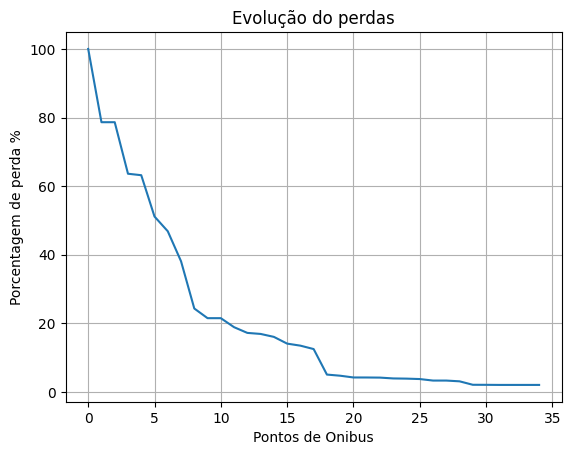

In [159]:
plt.plot(perdas)
plt.title('Evolução do perdas - Decisao por 18 pontos!')
plt.xlabel('Pontos de Onibus')
plt.ylabel('Porcentagem de perda %')
plt.grid()
plt.show()

In [160]:
perdas

[100.0,
 78.63059083379348,
 78.63059083379348,
 63.60436223081171,
 63.176421866372166,
 51.12506902263942,
 46.83186085035892,
 38.08669243511872,
 24.30287134180011,
 21.48674765323026,
 21.48674765323026,
 18.856985091109884,
 17.193539480949752,
 16.88983986747653,
 16.03395913859746,
 14.066813914964108,
 13.473219215902816,
 12.47929320817228,
 5.03865267807841,
 4.707344008834897,
 4.196576477084483,
 4.1896742131419105,
 4.155162893429045,
 3.913583655438984,
 3.858365543898399,
 3.7341247929320818,
 3.2923799006073993,
 3.2923799006073993,
 3.071507454445058,
 2.063776918829376,
 2.04997239094423,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937]

In [ ]:
[100.0,
 78.63059083379348,
 78.63059083379348,
 63.60436223081171,
 63.176421866372166,
 51.12506902263942,
 46.83186085035892,
 38.08669243511872,
 24.30287134180011,
 21.48674765323026,
 21.48674765323026,
 18.856985091109884,
 17.193539480949752,
 16.88983986747653,
 16.03395913859746,
 14.066813914964108,
 13.473219215902816,
 12.47929320817228,
 5.03865267807841,
 4.707344008834897,
 4.196576477084483,
 4.1896742131419105,
 4.155162893429045,
 3.913583655438984,
 3.858365543898399,
 3.7341247929320818,
 3.2923799006073993,
 3.2923799006073993,
 3.071507454445058,
 2.063776918829376,
 2.04997239094423,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937,
 2.022363335173937]

## Demonstracao de Pivot/OD

In [161]:
agrupamento_junho = viagens_validas.groupby(['PontoInicial','PontoFinal']).agg({'sequence':'count'}).reset_index()
agrupamento_junho.pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)


# pivotttt = agrupamento_junho[   (agrupamento_junho['dataInicio'] == 6)  &
#                                     (agrupamento_junho['day'] == 1)         &
#                                     (agrupamento_junho['periodo'] == 'Tarde')].pivot(index= 'PontoInicial', columns='PontoFinal', values='sequence').fillna(0)
# pivotttt

PontoFinal,0,1,2,3,4,5,6,7,8,9,...,24,25,27,28,29,30,31,32,33,34
PontoInicial,,,,,,,,,,,,,,,,,,,,,
0,13.0,2.0,32.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,...,0.0,2.0,1.0,20.0,5.0,238.0,24.0,0.0,0.0,0.0
1,50.0,4.0,30.0,4.0,55.0,41.0,45.0,50.0,0.0,33.0,...,0.0,52.0,103.0,36.0,2.0,15.0,19.0,27.0,0.0,0.0
2,25.0,6.0,0.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,1.0,8.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,7.0,2.0,2.0,14.0,0.0,0.0,0.0
4,3.0,0.0,46.0,2.0,0.0,30.0,1.0,4.0,0.0,4.0,...,0.0,2.0,0.0,5.0,0.0,7.0,4.0,0.0,0.0,0.0
5,29.0,3.0,11.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,0.0,2.0,1.0,37.0,2.0,126.0,16.0,0.0,1.0,0.0
6,11.0,11.0,11.0,1.0,0.0,18.0,0.0,2.0,0.0,5.0,...,0.0,4.0,13.0,67.0,5.0,0.0,57.0,9.0,0.0,0.0
7,10.0,18.0,6.0,0.0,0.0,18.0,2.0,0.0,0.0,17.0,...,1.0,5.0,16.0,22.0,13.0,2.0,14.0,12.0,0.0,0.0
8,1.0,86.0,1.0,3.0,9.0,0.0,4.0,5.0,9.0,4.0,...,0.0,0.0,12.0,4.0,19.0,1.0,0.0,0.0,1.0,2.0


In [162]:
## pego uma serie de medianas
    ## rodo o kamedias e ele adequa quais ptos de onibus serao representados por essas medianas
    ## calculo distancia 
    ## guardo a menor distancia e a quais pontos ela corresponte